In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
k_list = [2, 3, 4, 5, *range(10, 101, 10)]
n = 100
q = 100
p_list = [0.5, 1, 2, 5, "inf"] # None instead of inf to calculate Chebyshev distance with Lp_norm()

In [3]:
def gen_data(q, n, k): # Generating the data
  pts = np.random.uniform(0, 1, size=(q, n, k))
  og = np.zeros(k)
  for i in range(0, q):
    for j in range(0, n):
      while np.allclose(pts[i][j], og):
        pts[i][j] = np.random.uniform(0, 1, size=k)
  return pts

def Lp_norm(p, a, b):
  if (p == "inf"): # Chebyshev distance
    return max(abs(a-b))
  return (np.sum((abs(a - b))**p))**(1/p)

def distance(p, pts, q, n, k): # Lp norm for pts of size (q, n, k)
  og = np.zeros(k)
  dists = np.empty((q, n))
  for i in range(0, q):
    for j in range(0, n):
      dists[i][j] = Lp_norm(p, pts[i][j], og)
  return dists

def distances(p_list, pts, q, n, k): # Lp norms for all p in p_list for pts of size (q, n, k)
  dists = {}
  for p in p_list:
    dist = distance(p, pts, q, n, k)
    stats = {}
    stats["Dmin"] = np.min(dist, axis=1)
    stats["Min_avg"] = np.mean(stats["Dmin"])

    stats["Dmax"] = np.max(dist, axis=1)
    stats["Max_avg"] = np.mean(stats["Dmax"])

    stats["Dmean"] = np.mean(dist, axis=1)
    stats["Avg_avg"] = np.mean(stats["Dmean"])

    stats["Dvar"] = np.var(dist, axis=1, ddof=1)
    stats["Var_avg"] = np.mean(stats["Dvar"])

    stats["Ctr"] = np.divide(stats["Dmax"] - stats["Dmin"], stats["Dmin"])
    stats["Ctr_avg"] = np.mean(stats["Ctr"])

    finalobj = {}
    finalobj["dist"] = dist
    finalobj["stats"] = stats

    dists[p] = finalobj
  return dists

In [4]:
data = {}

for k in k_list:
  data[k] = gen_data(q, n, k)

dists_and_stats = {}
for k in k_list:
  dists_and_stats[k] = distances(p_list, data[k], q, n, k)

In [5]:
# formatting data for plotting
dfs = {}
for p in p_list:
    df = pd.DataFrame(np.nan, index = k_list, columns = ["min", "max", "avg", "var", "ctr"])

    for k in k_list:
        df.at[k, 'min'] = dists_and_stats[k][p]['stats']['Min_avg']
        df.at[k, 'max'] = dists_and_stats[k][p]['stats']['Max_avg']
        df.at[k, 'avg'] = dists_and_stats[k][p]['stats']['Avg_avg']
        df.at[k, 'var'] = dists_and_stats[k][p]['stats']['Var_avg']
        df.at[k, 'ctr'] = dists_and_stats[k][p]['stats']['Ctr_avg']
    
    dfs[p] = df

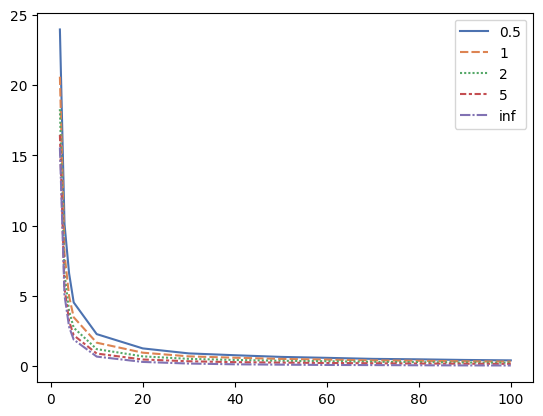

In [6]:
# relative contrast plot
df_ctr = pd.DataFrame(np.nan, index = k_list, columns = p_list)
for p in p_list:
    df_ctr[p] = dfs[p]['ctr']

ax = sns.lineplot(data = df_ctr, palette = 'deep')
ax.get_figure().savefig("ctr.png")


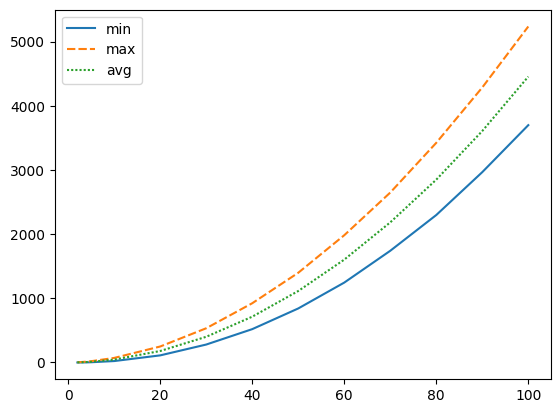

In [7]:
# min, max, avg plot, p = 0.5
ax = sns.lineplot(data = dfs[0.5][['min', 'max', 'avg']])
ax.get_figure().savefig("mma05.png")

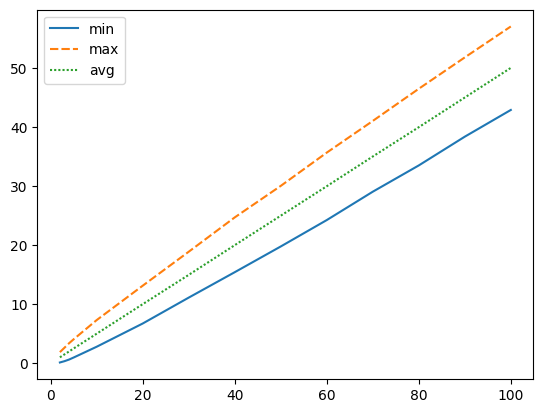

In [8]:
# min, max, avg plot, p = 1
ax = sns.lineplot(data = dfs[1][['min', 'max', 'avg']])
ax.get_figure().savefig("mma1.png")

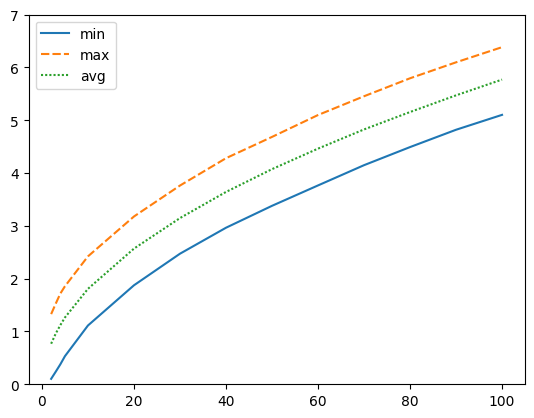

In [9]:
# min, max, avg plot, p = 2
ax = sns.lineplot(data = dfs[2][['min', 'max', 'avg']])
ax.set_ylim([0, 7])
ax.get_figure().savefig("mma2.png")

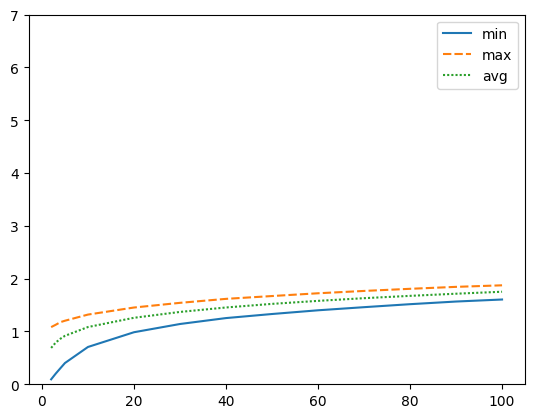

In [10]:
# min, max, avg plot, p = 5
ax = sns.lineplot(data = dfs[5][['min', 'max', 'avg']])
ax.set_ylim([0, 7])
ax.get_figure().savefig("mma5.png")

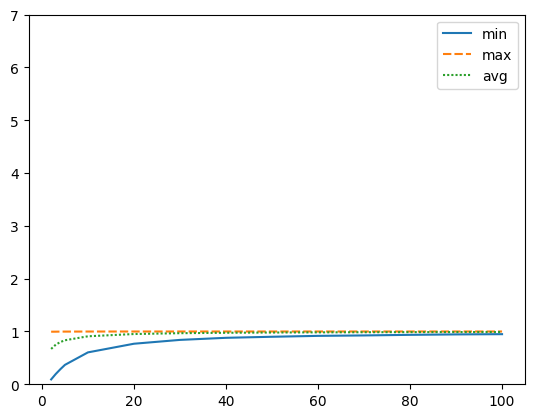

In [11]:
# min, max, avg plot, p = inf
ax = sns.lineplot(data = dfs['inf'][['min', 'max', 'avg']])
ax.set_ylim([0, 7])
ax.get_figure().savefig("mmainf.png")

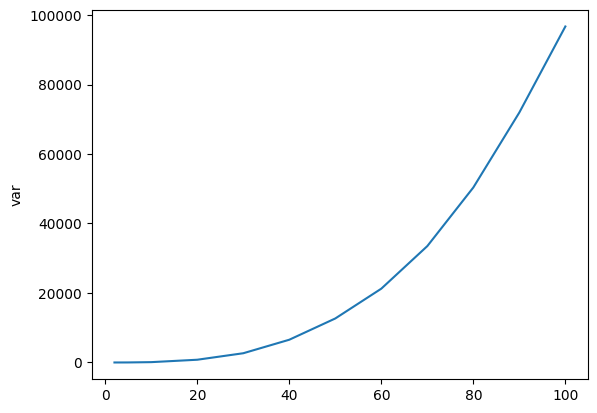

In [12]:
# variance plot, p = 0.5
ax = sns.lineplot(data = dfs[0.5]['var'])
ax.get_figure().savefig('var05.png')

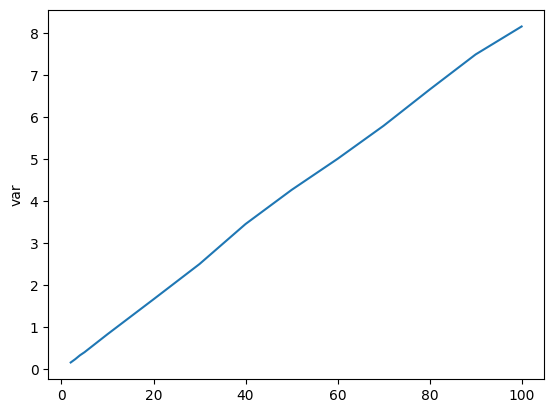

In [13]:
# variance plot, p = 1
ax = sns.lineplot(data = dfs[1]['var'])
ax.get_figure().savefig('var1.png')

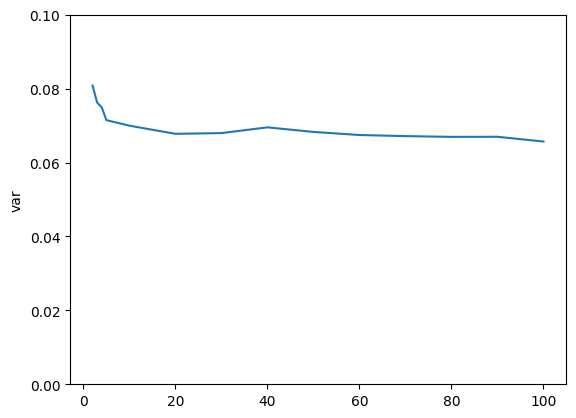

In [14]:
# variance plot, p = 2
ax = sns.lineplot(data = dfs[2]['var'])
ax.set_ylim([0, 0.1])
ax.get_figure().savefig('var2.png')

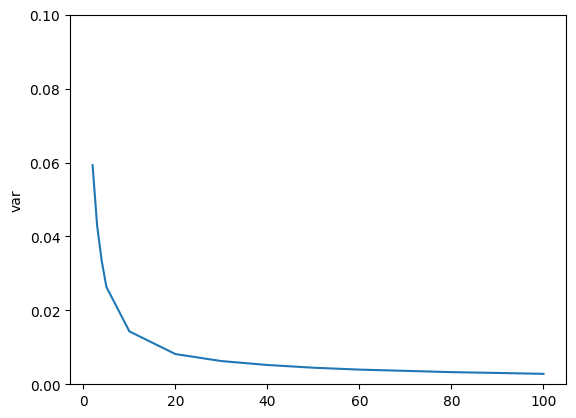

In [15]:
# variance plot, p = 5
ax = sns.lineplot(data = dfs[5]['var'])
ax.set_ylim([0, 0.1])
ax.get_figure().savefig('var5.png')

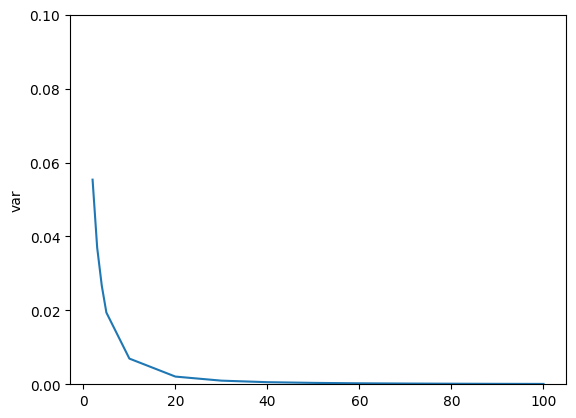

In [16]:
# variance plot, p = inf
ax = sns.lineplot(data = dfs['inf']['var'])
ax.set_ylim([0, 0.1])
ax.get_figure().savefig('varinf.png')